<a href="https://colab.research.google.com/github/JohnAntonusMaximus/convolutional-neural-network/blob/master/Convolutional_Neural_Network_TensorFlow_2_0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import All Dependencies

In [0]:
!pip install tensorflow-gpu==2.0.0-alpha

In [0]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.0.0-alpha0'

## Dataset preprocessing

### Loading the Cifar10 dataset

In [0]:
## Cifar dataset has 10 potential labels for images. 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Image normalization

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

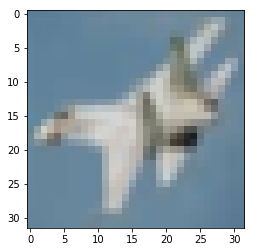

In [0]:
# View one of the images using matplotlib imshow
plt.imshow(X_test[10])

## Convolutional neural network

### Define a sequential model

In [0]:
model = tf.keras.models.Sequential()

### First CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 64
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Add Flattening Layer for ANN Feed-Forward

In [0]:
model.add(tf.keras.layers.Flatten())

### ANN First Layer

ANN layer hyper-parameters:

   Neurons: 128
   Activation Function: Relu

Dropout Layers: 40%

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation="relu"))

In [0]:
model.add(tf.keras.layers.Dropout(0.4))

In [0]:
model.add(tf.keras.layers.Dense(units=256, activation="relu"))

In [0]:
model.add(tf.keras.layers.Dropout(0.4))

### ANN Output Layer

ANN layer hyper-parameters:

   Neurons: 10 (One for each category)
   Activation Function: Softmax (classifier)

In [0]:
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

### Summarize The Model

In [0]:
model.summary()

### Compile The Model



   Loss Function: Sparse Categorical Crossentropy
   
   Optimizer: RMSprop
   
   Metrics: Sparse Categorical Accuracy

In [0]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(0.001), 
              metrics=["sparse_categorical_accuracy"])


### Training the model

In [0]:
model.fit(X_train, y_train, epochs=20)

### Model Evaulation

In [0]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {}".format(test_accuracy))

### Make A Prediction And Show The Image 

'truck'

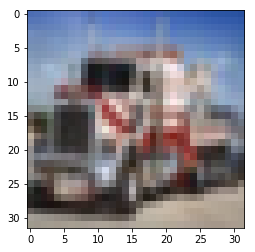

In [0]:
## Change the index of the image in the test set to make a prediction and show the actual image
index = 285   ## <- Change this 

## Don't Change any of this
predictions = model.predict(X_test[[index]])
max = np.argmax(predictions[0])
object = class_names[max]
plt.imshow(X_test[index])
object
  